<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [14]:
import json 
# Define the file path for the JSON file
json_file_path1 = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path1, 'r') as json_file:
    boolean_list_out1 = json.load(json_file)
    
json_file_path2 = 'problem_1/dataset_2.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path2, 'r') as json_file:
    boolean_list_out2 = json.load(json_file)
    
json_file_path3 = 'problem_1/dataset_3.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path3, 'r') as json_file:
    boolean_list_out3 = json.load(json_file)

print(boolean_list_out1)
print(boolean_list_out2)
print(boolean_list_out3)

[True, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, True, True, False, False, True, False, False, False, True, True, False, False, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, True, False, False, False, False, False, False, True, False, False, 

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



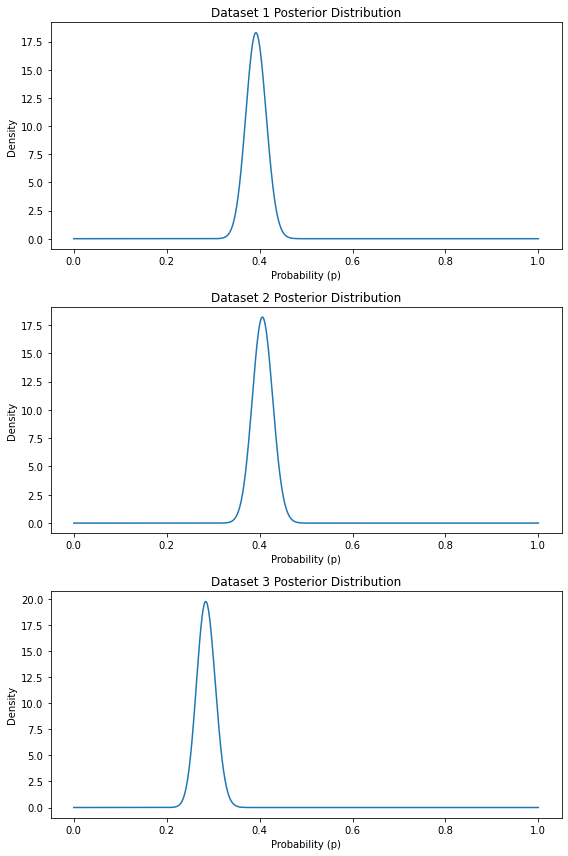

Dataset 1: Expectation = 0.392, Variance = 0.000
Dataset 2: Expectation = 0.406, Variance = 0.000
Dataset 3: Expectation = 0.285, Variance = 0.000


'--------------------Write your code above this line------------------------------'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''

import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the file paths for the three datasets
json_file_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']

# Create a figure with three subplots in a vertical arrangement
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Initialize a list to store expectation values and variances
expectation_values = []
variances = []

for i, json_file_path in enumerate(json_file_paths):
    # Read the boolean data from the JSON file into a Python list
    with open(json_file_path, 'r') as json_file:
        boolean_list_out = json.load(json_file)

    # Count the number of Heads and Tails in the dataset
    num_heads = sum(boolean_list_out)
    num_tails = len(boolean_list_out) - num_heads

    # Calculate the posterior distribution using Bayesian inference
    alpha = 1 + num_heads  # Adding 1 for the uniform prior
    beta_value = 1 + num_tails  # Adding 1 for the uniform prior

    # Generate a range of probabilities for the x-axis
    x = np.linspace(0, 1, 1000)

    # Calculate the posterior distribution using the Beta distribution
    posterior = beta.pdf(x, alpha, beta_value)

    # Plot the posterior distribution
    axs[i].plot(x, posterior)
    axs[i].set_title(f'Dataset {i + 1} Posterior Distribution')
    axs[i].set_xlabel('Probability (p)')
    axs[i].set_ylabel('Density')

    # Calculate the expectation value and variance
    expectation = alpha / (alpha + beta_value)
    variance = (alpha * beta_value) / ((alpha + beta_value) ** 2 * (alpha + beta_value + 1))

    expectation_values.append(expectation)
    variances.append(variance)

# Display the plots
plt.tight_layout()
plt.show()

# Print the expectation values and variances for each dataset
for i in range(3):
    print(f'Dataset {i + 1}: Expectation = {expectation_values[i]:.3f}, Variance = {variances[i]:.3f}')



'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

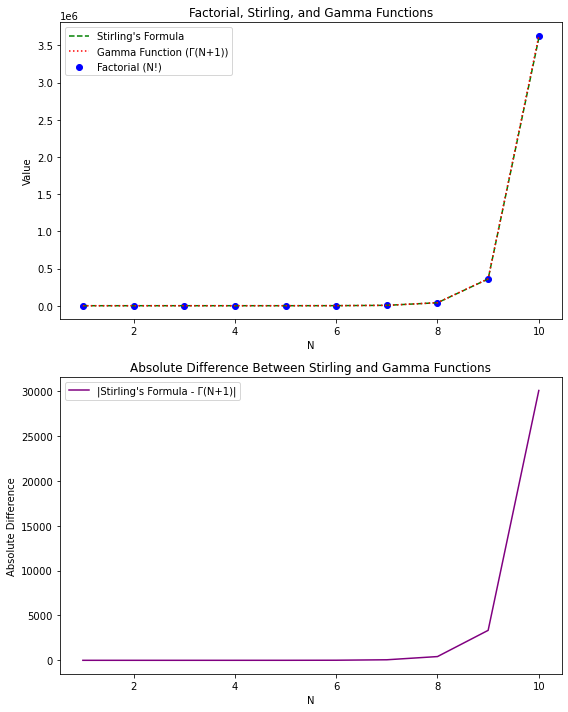

'--------------------Write your code above this line------------------------------'

In [3]:

'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial, gamma

# Define a range of values for N
N_values = np.arange(1, 11)

# Calculate the factorial for each N
factorial_values = [factorial(N) for N in N_values]

# Calculate the Stirling's approximation for each N
stirling_values = [np.sqrt(2 * np.pi * N) * (N / np.e) ** N for N in N_values]

# Calculate the Gamma function for each N+1
gamma_values = [gamma(N + 1) for N in N_values]

# Calculate the absolute difference between Stirling's formula and the Gamma function
difference_values = [abs(stirling - gamma) for stirling, gamma in zip(stirling_values, gamma_values)]

# Create a (2,1) plot
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot Factorial, Stirling's formula, and the Gamma function
axs[0].scatter(N_values, factorial_values, label='Factorial (N!)', color='blue')
axs[0].plot(N_values, stirling_values, label="Stirling's Formula", linestyle='--', color='green')
axs[0].plot(N_values, gamma_values, label='Gamma Function (Γ(N+1))', linestyle=':', color='red')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Value')
axs[0].set_title('Factorial, Stirling, and Gamma Functions')
axs[0].legend()

# Plot the absolute difference between Stirling's formula and the Gamma function
axs[1].plot(N_values, difference_values, label="|Stirling's Formula - Γ(N+1)|", color='purple')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Absolute Difference')
axs[1].set_title('Absolute Difference Between Stirling and Gamma Functions')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
The likelihood function for observing the data (successes and failures) given p is the product of these probabilities for each observation:
$L(p) = \prod_{i=1}^{M} p^{1_i} (1-p)^{N_i - 1_i}$

where $1_i$ is 1 if the i-th trial is a success and 0 if it's a failure. $N_i$ is the number of trials for the i-th observation.

To find the MLE for p, you want to maximize this likelihood function, and you can do so by finding the derivative of the log-likelihood with respect to p and setting it to zero:
$\frac{\partial}{\partial p} \log(L(p)) = 0$

Taking the derivative with respect to p, we get:
$\sum_{i=1}^{M} \left( \frac{1_{i}}{p} - \frac{N_{i} - 1_{i}}{1-p} \right) = 0$

Now, we can differentiate the terms with respect to p:
$\sum_{i=1}^{M} \frac{1_{i}}{p} = \sum_{i=1}^{M} \frac{N_{i} - 1_{i}}{1-p}$
To solve this equation for p, you can simplify and rearrange the terms:

Now, you can solve for p:

$p = \frac{\sum_{i=1}^{M} 1_{i}}{\sum_{i=1}^{M} (N_{i} - 1_{i})}$







'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''

<br>**Data set 1:**<br> **Data set 2:** <br>**Data set 3:**
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

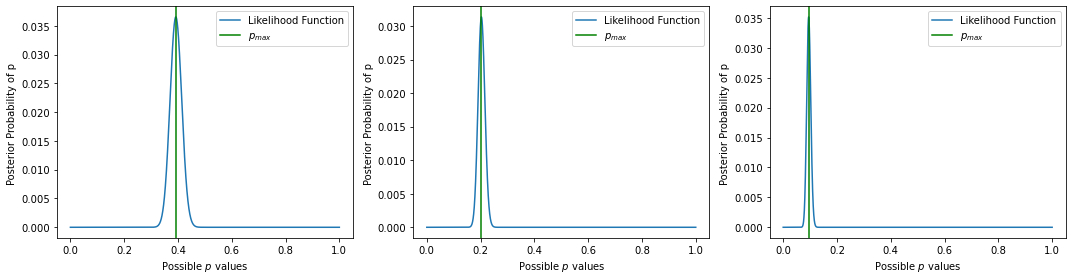

'--------------------Write your code above this line------------------------------'

In [53]:


'''--------------------Write your code below this line------------------------------'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import json

true_mean_values = []
mle_estimates = []
total_sample_size = 0
N = 5000
num_trials = 3
sample_sizes = []
fig, axs = plt.subplots(1, num_trials, figsize=(15, 4))
bias_values = np.linspace(0, 1, N)

for trial in range(num_trials):
    filename = f'problem_1/dataset_{trial + 1}.json'  # Adjust the file naming as needed
    with open(filename, 'r') as json_file:
        outcomes = json.load(json_file)
    outcomes = np.array(outcomes)
    num_heads = np.sum(outcomes)
    num_tails = len(outcomes) - num_heads
    total_sample_size += len(outcomes)
    sample_sizes.append(total_sample_size)
    
    true_mean = num_heads / total_sample_size
    true_mean_values.append(true_mean)
    
    likelihood = binom.pmf(num_heads, total_sample_size, bias_values)
    
    mle_estimate = bias_values[np.argmax(likelihood)]
    mle_estimates.append(mle_estimate)
    
    possible_num_heads = np.arange(total_sample_size)
    max_likelihood = binom.pmf(possible_num_heads, total_sample_size, mle_estimate)
    
    axs[trial].plot(bias_values, likelihood, label='Likelihood Function')
    
    p_max = num_heads / total_sample_size
    
    axs[trial].axvline(x=p_max, color='green', label='$p_{max}$')

    axs[trial].set_xlabel("Possible $p$ values")
    axs[trial].set_ylabel("Posterior Probability of p ")
    axs[trial].legend()

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

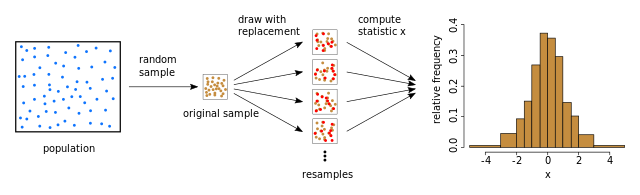
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



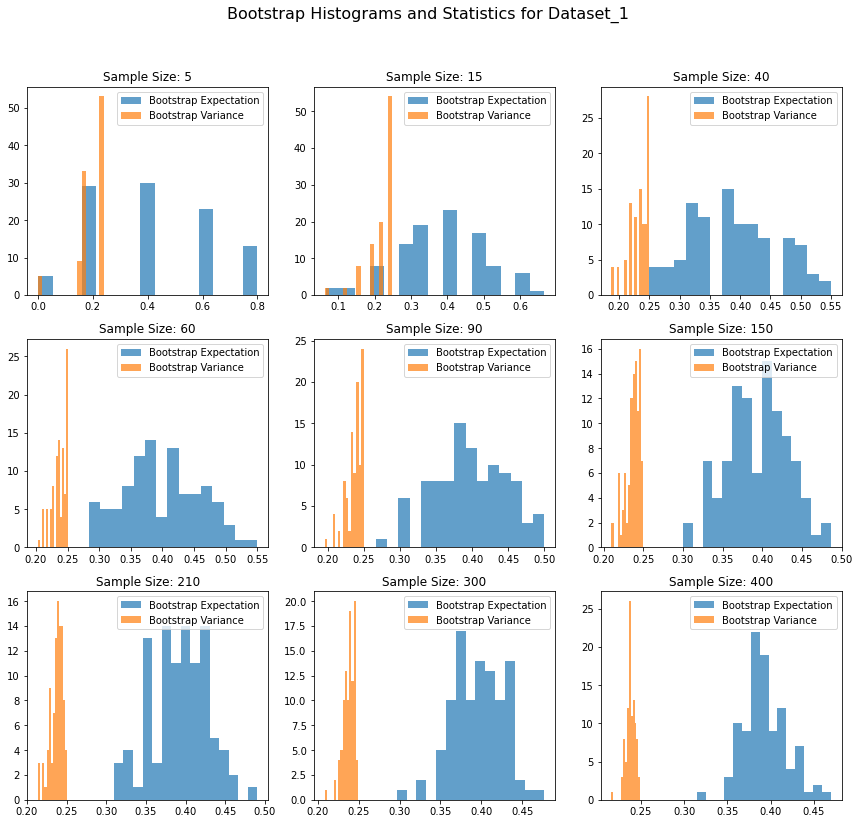

Sample Size: 5, Expectation Value: 0.420, Variance: 0.194
Sample Size: 15, Expectation Value: 0.377, Variance: 0.220
Sample Size: 40, Expectation Value: 0.391, Variance: 0.233
Sample Size: 60, Expectation Value: 0.400, Variance: 0.237
Sample Size: 90, Expectation Value: 0.397, Variance: 0.237
Sample Size: 150, Expectation Value: 0.394, Variance: 0.237
Sample Size: 210, Expectation Value: 0.392, Variance: 0.237
Sample Size: 300, Expectation Value: 0.396, Variance: 0.238
Sample Size: 400, Expectation Value: 0.393, Variance: 0.238


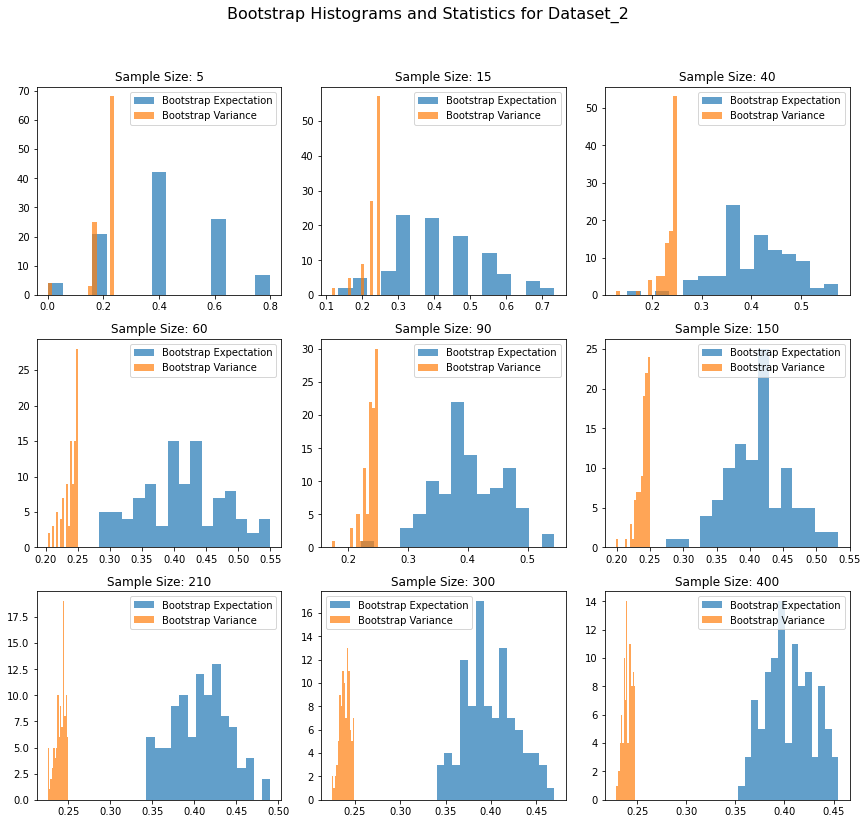

Sample Size: 5, Expectation Value: 0.420, Variance: 0.194
Sample Size: 15, Expectation Value: 0.377, Variance: 0.220
Sample Size: 40, Expectation Value: 0.391, Variance: 0.233
Sample Size: 60, Expectation Value: 0.400, Variance: 0.237
Sample Size: 90, Expectation Value: 0.397, Variance: 0.237
Sample Size: 150, Expectation Value: 0.394, Variance: 0.237
Sample Size: 210, Expectation Value: 0.392, Variance: 0.237
Sample Size: 300, Expectation Value: 0.396, Variance: 0.238
Sample Size: 400, Expectation Value: 0.393, Variance: 0.238


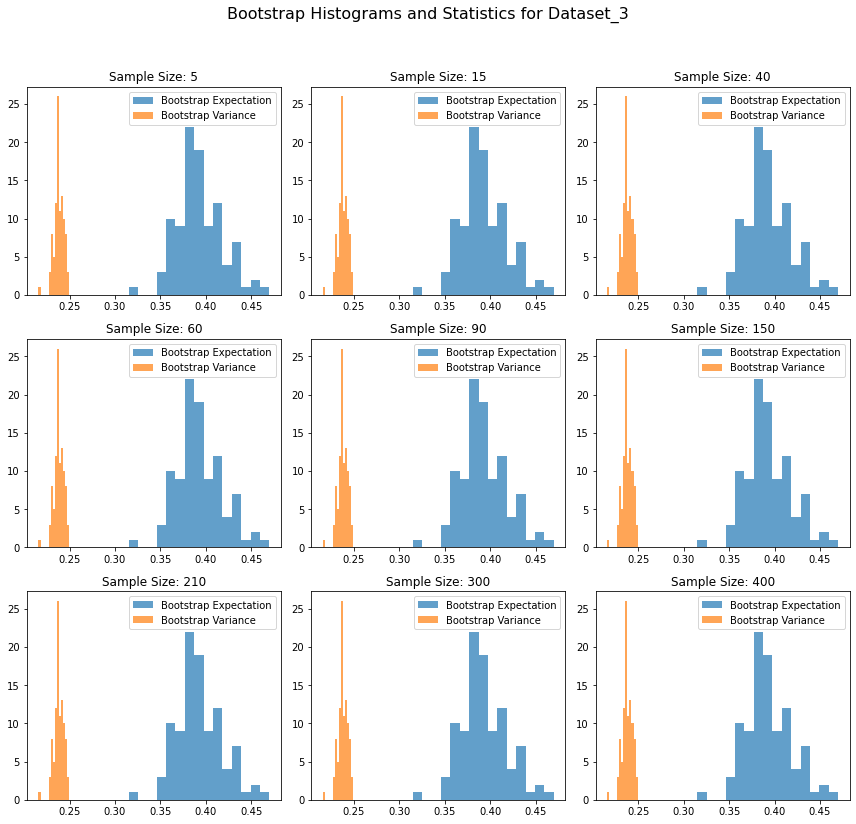

Sample Size: 5, Expectation Value: 0.420, Variance: 0.194
Sample Size: 15, Expectation Value: 0.377, Variance: 0.220
Sample Size: 40, Expectation Value: 0.391, Variance: 0.233
Sample Size: 60, Expectation Value: 0.400, Variance: 0.237
Sample Size: 90, Expectation Value: 0.397, Variance: 0.237
Sample Size: 150, Expectation Value: 0.394, Variance: 0.237
Sample Size: 210, Expectation Value: 0.392, Variance: 0.237
Sample Size: 300, Expectation Value: 0.396, Variance: 0.238
Sample Size: 400, Expectation Value: 0.393, Variance: 0.238


'--------------------Write your code above this line------------------------------'

In [62]:
'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the file path for dataset_1
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    dataset_1 = json.load(json_file)

# Sample sizes to use
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

# Number of bootstrap samples
num_bootstrap_samples = 100

# Create a (3, 3) subplot for histograms
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Initialize lists to store expectation values and variances
expectation_values = []
variances = []

for i, sample_size in enumerate(sample_sizes):
    # Create subplots for dataset_1
    ax = axs[i // 3, i % 3]

    # Initialize arrays to store bootstrap sample statistics
    bootstrap_expectations = []
    bootstrap_variances = []

    for _ in range(num_bootstrap_samples):
        # Bootstrap resampling with replacement
        bootstrap_sample = np.random.choice(dataset_1, size=sample_size, replace=True)

        # Calculate expectation value and variance for the bootstrap sample
        bootstrap_expectation = np.mean(bootstrap_sample)
        bootstrap_variance = np.var(bootstrap_sample)

        bootstrap_expectations.append(bootstrap_expectation)
        bootstrap_variances.append(bootstrap_variance)

    # Plot the histogram for dataset_1
    ax.hist(bootstrap_expectations, bins=15, alpha=0.7, label='Bootstrap Expectation')
    ax.hist(bootstrap_variances, bins=15, alpha=0.7, label='Bootstrap Variance')
    ax.set_title(f'Sample Size: {sample_size}')
    ax.legend()

    # Calculate the expectation value and variance for dataset_1
    expectation_values.append(np.mean(bootstrap_expectations))
    variances.append(np.mean(bootstrap_variances))

# Add a title for the entire figure
fig.suptitle('Bootstrap Histograms and Statistics for Dataset_1', fontsize=16)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print the expectation values and variances
for i, sample_size in enumerate(sample_sizes):
    print(f'Sample Size: {sample_size}, Expectation Value: {expectation_values[i]:.3f}, Variance: {variances[i]:.3f}')

    
json_file_path = 'problem_1/dataset_2.json'
with open(json_file_path, 'r') as json_file:
    dataset_2 = json.load(json_file)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
expectation_values2 = []
variances2 = []

for i, sample_size in enumerate(sample_sizes):
    ax = axs[i // 3, i % 3]
    bootstrap_expectations2 = []
    bootstrap_variances2 = []

    for _ in range(num_bootstrap_samples):
        bootstrap_sample2 = np.random.choice(dataset_2, size=sample_size, replace=True)
        bootstrap_expectation2 = np.mean(bootstrap_sample2)
        bootstrap_variance2 = np.var(bootstrap_sample2)
        bootstrap_expectations2.append(bootstrap_expectation2)
        bootstrap_variances2.append(bootstrap_variance2)

    ax.hist(bootstrap_expectations2, bins=15, alpha=0.7, label='Bootstrap Expectation')
    ax.hist(bootstrap_variances2, bins=15, alpha=0.7, label='Bootstrap Variance')
    ax.set_title(f'Sample Size: {sample_size}')
    ax.legend()

    expectation_values2.append(np.mean(bootstrap_expectations2))
    variances2.append(np.mean(bootstrap_variances2))

# Add a title for the entire figure
fig.suptitle('Bootstrap Histograms and Statistics for Dataset_2', fontsize=16)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print the expectation values and variances
for i, sample_size in enumerate(sample_sizes):
    print(f'Sample Size: {sample_size}, Expectation Value: {expectation_values[i]:.3f}, Variance: {variances[i]:.3f}')

with open(json_file_path, 'r') as json_file:
    dataset_3 = json.load(json_file)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
expectation_values3 = []
variances3 = []
for i, sample_size in enumerate(sample_sizes):
    # Create subplots for dataset_1
    ax = axs[i // 3, i % 3]

    # Initialize arrays to store bootstrap sample statistics
    bootstrap_expectations3 = []
    bootstrap_variances3 = []

    for _ in range(num_bootstrap_samples):
        # Bootstrap resampling with replacement
        bootstrap_sample3 = np.random.choice(dataset_3, size=sample_size, replace=True)

        # Calculate expectation value and variance for the bootstrap sample
        bootstrap_expectation3 = np.mean(bootstrap_sample3)
        bootstrap_variance3 = np.var(bootstrap_sample3)

        bootstrap_expectations3.append(bootstrap_expectation3)
        bootstrap_variances3.append(bootstrap_variance3)

    # Plot the histogram for dataset_1
    ax.hist(bootstrap_expectations, bins=15, alpha=0.7, label='Bootstrap Expectation')
    ax.hist(bootstrap_variances, bins=15, alpha=0.7, label='Bootstrap Variance')
    ax.set_title(f'Sample Size: {sample_size}')
    ax.legend()

    expectation_values3.append(np.mean(bootstrap_expectations))
    variances3.append(np.mean(bootstrap_variances))

# Add a title for the entire figure
fig.suptitle('Bootstrap Histograms and Statistics for Dataset_3', fontsize=16)

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print the expectation values and variances
for i, sample_size in enumerate(sample_sizes):
    print(f'Sample Size: {sample_size}, Expectation Value: {expectation_values[i]:.3f}, Variance: {variances[i]:.3f}')

    
    

'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

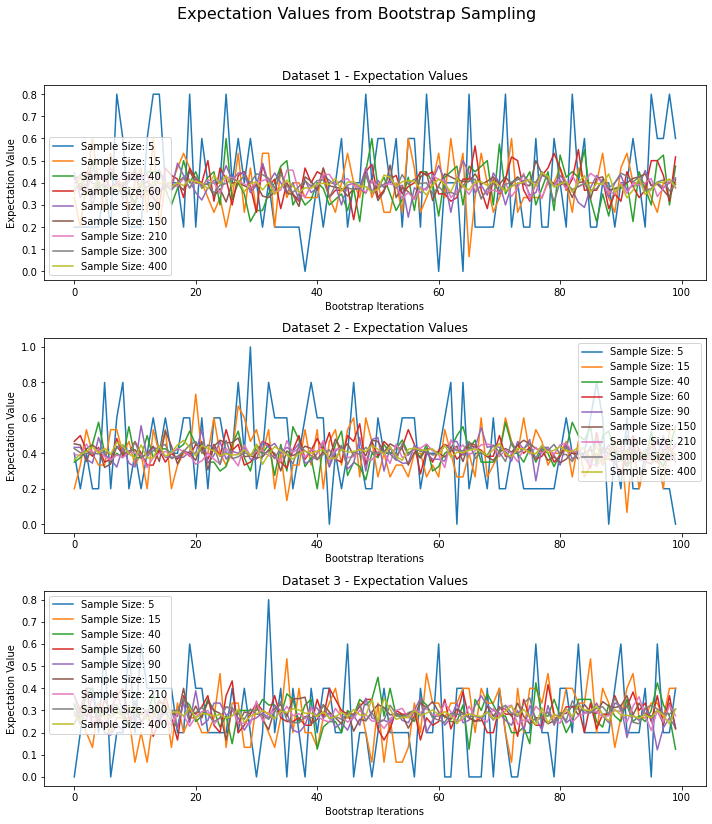

'--------------------Write your code above this line------------------------------'

In [64]:


'''--------------------Write your code below this line------------------------------'''
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths for the three datasets
json_file_paths = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']

# Sample sizes to use
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

# Number of bootstrap samples
num_bootstrap_samples = 100

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Iterate over the three datasets
for i, json_file_path in enumerate(json_file_paths):
    with open(json_file_path, 'r') as json_file:
        dataset = json.load(json_file)

    # Initialize lists to store expectation values and variances
    expectation_values = []
    variances = []

    # Bootstrap for each sample size
    for sample_size in sample_sizes:
        bootstrap_expectations = []
        bootstrap_variances = []

        for _ in range(num_bootstrap_samples):
            # Bootstrap resampling with replacement
            bootstrap_sample = np.random.choice(dataset, size=sample_size, replace=True)

            # Calculate expectation value and variance for the bootstrap sample
            bootstrap_expectation = np.mean(bootstrap_sample)
            bootstrap_variance = np.var(bootstrap_sample)

            bootstrap_expectations.append(bootstrap_expectation)
            bootstrap_variances.append(bootstrap_variance)

        expectation_values.append(bootstrap_expectations)
        variances.append(bootstrap_variances)

    # Plot expectation values
    ax = axs[i]
    for j, sample_size in enumerate(sample_sizes):
        ax.plot(range(num_bootstrap_samples), expectation_values[j], label=f'Sample Size: {sample_size}')

    ax.set_xlabel('Bootstrap Iterations')
    ax.set_ylabel('Expectation Value')
    ax.set_title(f'Dataset {i + 1} - Expectation Values')
    ax.legend()

# Add a common title for the entire figure
fig.suptitle('Expectation Values from Bootstrap Sampling', fontsize=16)

# Adjust subplot spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()



'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [65]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, x):
        if x < 0:
            return 0  # Probability is zero for negative distances

        # Calculate the normalization factor Z(lambda)
        normalization_factor = 1 / (1 - (1 / self.decay_constant))

        # Calculate the PDF using the exponential function
        pdf = (1 / self.decay_constant) * normalization_factor * (2.71828 ** (-x / self.decay_constant))

        return pdf

'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

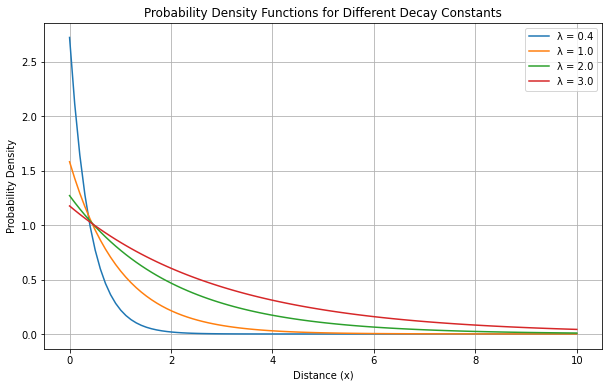

'--------------------Write your code above this line------------------------------'

In [19]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, x):
        if x < 0:
            return 0  # Probability is zero for negative distances

        # Calculate the normalization factor Z(lambda)
        normalization_factor = 1 / (1 - np.exp(-1 / self.decay_constant))

        # Calculate the PDF using the exponential function
        pdf = (1 / self.decay_constant) * normalization_factor * np.exp(-x / self.decay_constant)

        return pdf

# Define the decay constants for the four particles
decay_constants = [0.4, 1.0, 2.0, 3.0]

# Create particle objects for each decay constant
particles = [Particle(lambda_val) for lambda_val in decay_constants]

# Generate x values for the plot
x_values = np.linspace(0, 10, 100)  # Adjust the range as needed

# Create a single plot for all four PDF curves
plt.figure(figsize=(10, 6))
for particle, lambda_val in zip(particles, decay_constants):
    pdf_values = [particle.pdf_decay(x) for x in x_values]
    plt.plot(x_values, pdf_values, label=f'λ = {lambda_val}')

plt.xlabel('Distance (x)')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions for Different Decay Constants')
plt.legend()
plt.grid(True)
plt.show()




'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

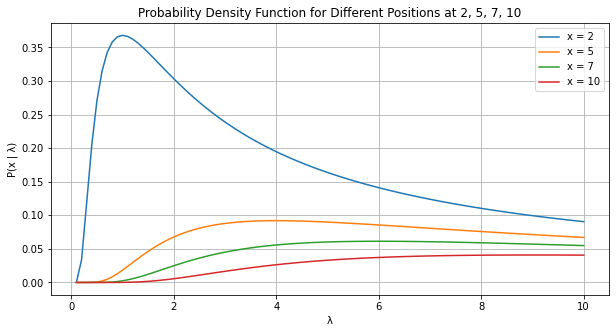

'--------------------Write your code above this line------------------------------'

In [22]:

'''--------------------Write your code below this line------------------------------'''
class Particle:
    def __init__(self, position):
        self.x = position
    

    def pdf_decay(self, lambda_):
        if self.x <= 0:
            return 0
        else:
            result = (1 / np.exp(-1 / lambda_)) * (1 / lambda_) * np.exp(-self.x / lambda_)
            return result
        

particles = [Particle(pos) for pos in [2, 5, 7, 10]]

lambda_values = np.linspace(0.1, 10, 100)

plt.figure(figsize=(10, 5))
for particle in particles:
    plt.plot(lambda_values, [particle.pdf_decay(l) for l in lambda_values], label=f'x = {particle.x}')

plt.xlabel('λ')
plt.ylabel('P(x | λ)')
plt.title('Probability Density Function for Different Positions at 2, 5, 7, 10')
plt.legend()
plt.grid(True)
plt.show()




'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


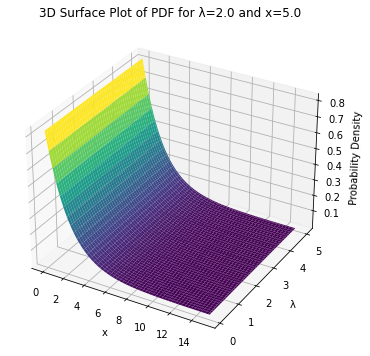

'--------------------Write your code above this line------------------------------'

In [13]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt


class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            normalization_factor = np.exp(-1 / self.decay_constant)
            return (1 / self.decay_constant) * np.exp(-x / self.decay_constant) / normalization_factor

    def pdf_at_position(self):
        return self.pdf_decay(self.position)

    def generate_3d_surface_plot(self, x_values, lambda_values, save_path):
        X, Y = np.meshgrid(x_values, lambda_values)
        Z = np.empty_like(X)

        for i in range(len(X)):
            for j in range(len(X[i])):
                Z[i, j] = self.pdf_decay(X[i, j])

        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')

        ax.set_xlabel('x')
        ax.set_ylabel('λ')
        ax.set_zlabel('Probability Density')

        plt.title(f'3D Surface Plot of PDF for λ={self.decay_constant} and x={self.position}')
        plt.savefig(save_path)
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create a Particle instance
    particle = Particle(decay_constant=2.0, position=5.0)

    # Define the x and lambda (decay constant) values for the plot
    x_values = np.linspace(0, 15, 100)
    lambda_values = np.linspace(0.1, 5.0, 100)

    # Generate and save the 3D surface plot
    save_path = '3d_surface_plot.png'
    particle.generate_3d_surface_plot(x_values, lambda_values, save_path)


'''--------------------Write your code above this line------------------------------'''

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




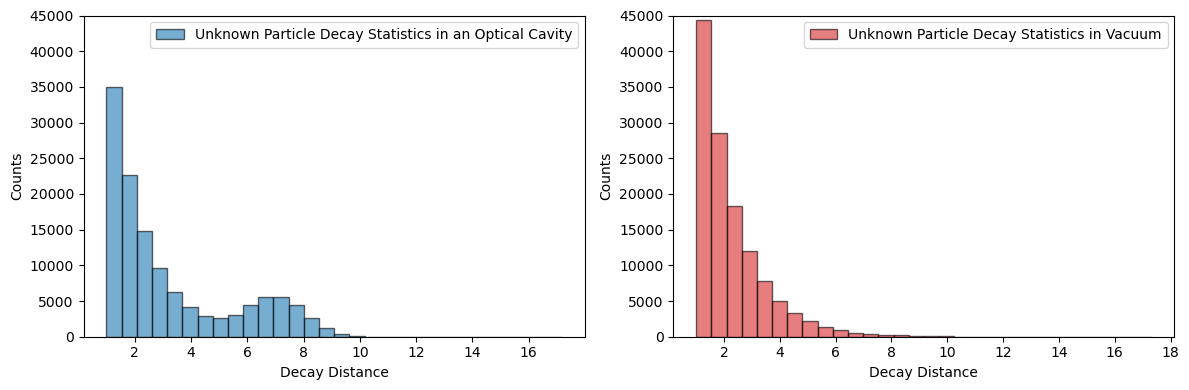

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

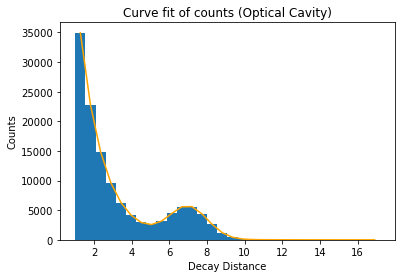

Curve fit gives λ as 1.2568685142283267


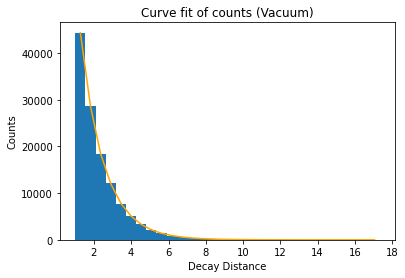

Curve fit gives λ as 1.2655802813527324


'--------------------Write your code above this line------------------------------'

In [34]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def prob(x, lam, mu, sig, A, B):
    return A * (sp.stats.norm.pdf(x, mu, sig)) + B * (np.exp(-(x - 1) / lam) / lam)

def fit_and_plot(data, title):
    bins = np.arange(0, 12)
    values, bins, _ = plt.hist(data, bins=30)
    bins = (bins[:-1] + bins[1:]) / 2
    popt, _ = sp.optimize.curve_fit(prob, bins, values, maxfev=1000, p0=[0.5, 7, 0.2, 0.3, 1])
    plt.plot(bins, prob(bins, *popt), color='orange')
    plt.title(title)
    plt.xlabel("Decay Distance")
    plt.ylabel("Counts")
    plt.show()
    print(f"Curve fit gives λ as {popt[0]}")

# Load and process the data for the optical cavity
cavity_data_path = "problem_2/Cavity_decay_dataset.json"
with open(cavity_data_path, 'r') as json_file:
    cavity_data = json.load(json_file)
fit_and_plot(cavity_data, "Curve fit of counts (Optical Cavity)")

# Load and process the data for the vacuum
vacuum_data_path = "problem_2/Vacuum_decay_dataset.json"
with open(vacuum_data_path, 'r') as json_file:
    vacuum_data = json.load(json_file)
fit_and_plot(vacuum_data, "Curve fit of counts (Vacuum)")




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

\begin{aligned}
& M(t \mid \lambda)=\int_0^{\infty} d x e^{t x} P(x \mid \lambda) \\
& M(t \mid \lambda)=\int_0^{\infty} d x e^{t x} e^{1 / \lambda}(1 / \lambda) e^{-x / \lambda} \\
& M(t \mid \lambda)=e^{1 / \lambda}(1 / \lambda) \frac{1}{t-1 / \lambda}\left[e^{t-1 / \lambda) \infty}-e^0\right] \\
& M(t \mid \lambda)=e^{1 / \lambda}(1 / \lambda) \frac{1}{t-1 / \lambda}[0-1] \\
& M(t \mid \lambda)=\frac{e^{1 / \lambda}}{1-\lambda}
\end{aligned}
'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
Given the moment generating function (MGF)$$ M(t | \lambda) = \frac{e^{1/\lambda}}{1 - \lambda}$$, you can use this result to calculate the mean and variance analytically by taking the first and second derivatives of the MGF with respect to \(t\).

1. **Mean (\(E[X]\))**:
   The mean of the random variable \(X\) can be calculated as the first derivative of the MGF with respect to \(t\) and then evaluating it at \(t = 0\):
   $$
   E[X] = \left. \frac{d}{dt} M(t | \lambda) \right|_{t=0}
   $$

2. **Variance (\(Var(X)\))**:
   The variance of the random variable \(X\) can be calculated as the second derivative of the MGF with respect to \(t\) and then evaluating it at \(t = 0\:
   $$
   Var(X) = \left. \frac{d^2}{dt^2} M(t | \lambda) \right|_{t=0}
   $$

Let's calculate these values step by step:

**Mean (Expected Value):**
$$
E[X] = \left. \frac{d}{dt} \left(\frac{e^{1/\lambda}}{1 - \lambda}\right) \right|_{t=0} = \left. \frac{e^{1/\lambda}}{(1 - \lambda)^2} \right|_{t=0}
$$

**Variance:**
$$
Var(X) = \left. \frac{d^2}{dt^2} \left(\frac{e^{1/\lambda}}{1 - \lambda}\right) \right|_{t=0} = \left. \frac{2e^{1/\lambda}}{(1 - \lambda)^3} \right|_{t=0}
$$

Now, let's evaluate these expressions:

**Mean (Expected Value):**
$$
E[X] = \frac{e^{1/\lambda}}{(1 - \lambda)^2}
$$

**Variance:**
$$
Var(X) = \frac{2e^{1/\lambda}}{(1 - \lambda)^3}
$$

So, the mean (\(E[X]\)) and variance (\(Var(X)\)) can be calculated using the provided MGF as shown above.
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

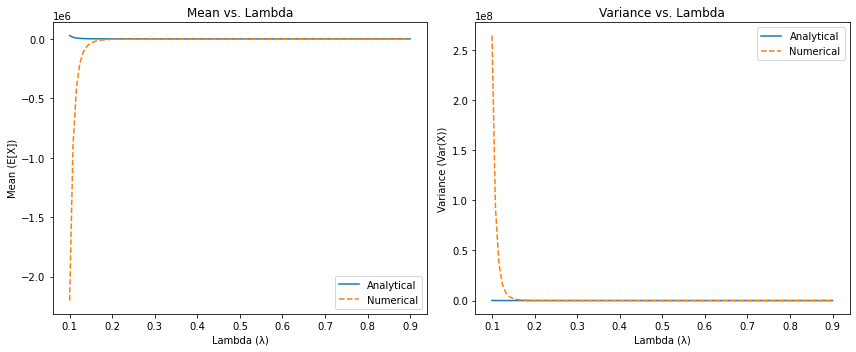

'--------------------Write your code above this line------------------------------'

In [38]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the MGF at a given lambda value
def MGF(lambda_val, t):
    return np.exp(1 / lambda_val) / (1 - lambda_val * t)

# Function to calculate the first derivative numerically using finite differences
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x)) / h

# Function to calculate the second derivative numerically using finite differences
def numerical_second_derivative(func, x, h=1e-5):
    return (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

# Lambda values for which to evaluate the derivatives
lambda_values = np.linspace(0.1, 0.9, 100)

# Analytical mean and variance calculations
analytical_mean = np.exp(1 / lambda_values) / (1 - lambda_values) ** 2
analytical_variance = 2 * np.exp(1 / lambda_values) / (1 - lambda_values) ** 3

# Numerical calculations of mean and variance
numerical_mean = [numerical_derivative(lambda lambda_val: MGF(lambda_val, 0), l) for l in lambda_values]
numerical_variance = [numerical_second_derivative(lambda lambda_val: MGF(lambda_val, 0), l) for l in lambda_values]

# Create plots to compare analytical and numerical results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lambda_values, analytical_mean, label='Analytical')
plt.plot(lambda_values, numerical_mean, label='Numerical', linestyle='--')
plt.xlabel('Lambda (λ)')
plt.ylabel('Mean (E[X])')
plt.title('Mean vs. Lambda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lambda_values, analytical_variance, label='Analytical')
plt.plot(lambda_values, numerical_variance, label='Numerical', linestyle='--')
plt.xlabel('Lambda (λ)')
plt.ylabel('Variance (Var(X))')
plt.title('Variance vs. Lambda')
plt.legend()

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

Certainly, here's the previous answer written in LaTeX style:

The probability mass function for a binomial distribution is given by:

$$
P(M = k) = \binom{N}{k} \cdot p^k \cdot (1 - p)^{N - k}
$$

To find the moment-generating function (MGF) for this probability mass function, we use the definition of the MGF:

$$
M_M(t) = E[e^{tM}]
$$

In this case, we have a random variable M that follows a binomial distribution with parameters N and p. So, we can calculate the MGF as follows:

$$
\begin{align*}
M_M(t) &= \sum_{k=0}^{N} e^{tk} \cdot P(M = k) \\
&= \sum_{k=0}^{N} e^{tk} \cdot \binom{N}{k} \cdot p^k \cdot (1 - p)^{N - k}
\end{align*}
$$

Using the binomial theorem, which states that \((a + b)^n = \sum_{k=0}^{n} \binom{n}{k} \cdot a^{n-k} \cdot b^k\), we can rewrite the above expression as:

$$
M_M(t) = \sum_{k=0}^{N} \binom{N}{k} \cdot (e^t \cdot p)^k \cdot (1 - p)^{N - k}
$$

Now, we can recognize that this is the expansion of the binomial theorem with \((e^t \cdot p)\) as "a" and \((1 - p)\) as "b" raised to the power N:

$$
M_M(t) = (e^t \cdot p + (1 - p))^N
$$

So, the MGF for the given probability mass function is:

$$
M_M(t) = (e^t \cdot p + (1 - p))^N
$$

This is the moment-generating function for the random variable M, which follows a binomial distribution with parameters N and p.


'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>


1. **Mean (Expected Value):**

The mean of a random variable M is given by the first derivative of its MGF with respect to t, evaluated at t = 0:

$$
\text{Mean} = \left.\frac{d}{dt}M_M(t)\right|_{t=0}
$$

So, let's find the first derivative of the MGF:

$$
\frac{d}{dt}M_M(t) = \frac{d}{dt}[(e^t \cdot p + (1 - p))^N]
$$

Using the chain rule, we get:

$$
= N(e^t \cdot p + (1 - p))^{N-1} \cdot \frac{d}{dt}(e^t \cdot p + (1 - p))
$$

Taking the derivative of e^t with respect to t is simply e^t, and the derivative of (1 - p) with respect to t is 0 since it's a constant. Therefore:

$$
= N(e^t \cdot p + (1 - p))^{N-1} \cdot (e^t \cdot p)
$$

Now, evaluate this expression at t = 0:

$$
\text{Mean} = N(p + (1 - p))^{N-1} \cdot (p) = N \cdot p
$$

So, the mean of the binomial distribution is Np.

2. **Variance:**

The variance of a random variable M is given by the second derivative of its MGF with respect to t, evaluated at t = 0:

$$
\text{Variance} = \left.\frac{d^2}{dt^2}M_M(t)\right|_{t=0}
$$

Let's find the second derivative of the MGF:

$$
\frac{d^2}{dt^2}M_M(t) = \frac{d}{dt}\left[N(e^t \cdot p + (1 - p))^{N-1} \cdot (e^t \cdot p)\right]
$$

Using the product rule for differentiation, we get:

$$
= \left(\frac{d}{dt}N(e^t \cdot p + (1 - p))^{N-1}\right) \cdot (e^t \cdot p) + N(e^t \cdot p + (1 - p))^{N-1} \cdot \left(\frac{d}{dt}(e^t \cdot p)\right)
$$

Now, we need to take the derivatives individually. The derivative of (e^t * p + (1 - p))^(N-1) is a bit involved, but we can use the chain rule. The derivative of e^t * p is e^t * p, and the derivative of (1 - p) is 0. Therefore:

$$
\frac{d}{dt}N(e^t \cdot p + (1 - p))^{N-1} = N(N-1)(e^t \cdot p) \cdot (e^t \cdot p + (1 - p))^(N-2)
$$

And the derivative of e^t * p is still e^t * p.

Now, let's evaluate the second derivative at t = 0:

$$
\text{Variance} = N(N-1)(p)^2 \cdot (p + (1 - p))^(N-2) + N(p)^2
$$

Simplifying:

$$
\text{Variance} = N(N-1)(p)^2 + N(p)^2 = N(N-1)(p)^2 + N(p)^2 = N^2(p)^2 - Np^2
$$

So, the variance of the binomial distribution is Np(1-p).




'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

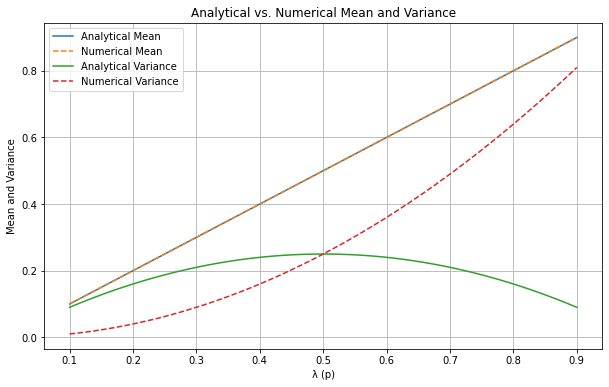

'--------------------Write your code above this line------------------------------'

In [46]:


'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the analytical mean and variance
def analytical_mean_variance(p):
    mean = p
    variance = p * (1 - p)
    return mean, variance

# Function to compute the MGF for a given λ (p)
def mgf(lambda_value, t):
    return np.exp(lambda_value * t)

# Numerically calculate the first and second derivatives
def numerical_derivative(lambda_value, t, h=1e-6):
    M_t = mgf(lambda_value, t)
    M_t_plus_h = mgf(lambda_value, t + h)
    first_derivative = (M_t_plus_h - M_t) / h
    second_derivative = (mgf(lambda_value, t + h) - 2 * M_t + mgf(lambda_value, t - h)) / (h ** 2)
    return first_derivative, second_derivative

# Range of λ (p) values to consider
lambda_values = np.linspace(0.1, 0.9, 100)

# Initialize arrays to store analytical and numerical results
analytical_means = []
analytical_variances = []
numerical_means = []
numerical_variances = []

# Calculate analytical and numerical results for each λ (p) value
for lambda_value in lambda_values:
    analytical_mean, analytical_variance = analytical_mean_variance(lambda_value)
    analytical_means.append(analytical_mean)
    analytical_variances.append(analytical_variance)

    # Numerically evaluate the derivatives
    t = 0  # We are evaluating at t=0
    first_derivative, second_derivative = numerical_derivative(lambda_value, t)
    numerical_means.append(first_derivative)
    numerical_variances.append(second_derivative)

# Plot analytical and numerical results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, analytical_means, label='Analytical Mean')
plt.plot(lambda_values, numerical_means, label='Numerical Mean', linestyle='dashed')
plt.plot(lambda_values, analytical_variances, label='Analytical Variance')
plt.plot(lambda_values, numerical_variances, label='Numerical Variance', linestyle='dashed')
plt.xlabel('λ (p)')
plt.ylabel('Mean and Variance')
plt.legend()
plt.title('Analytical vs. Numerical Mean and Variance')
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''